# Full data exploration for UK

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import savefig

from statsmodels.tsa.arima.model import ARIMA


In [4]:
uk_processed_dir = "../data/uk/processed/"

In [5]:
df = pd.read_csv(f'{uk_processed_dir}full_preprocessed.csv', index_col=0)
df.index = pd.to_datetime(df.index)

In [6]:
df

,wind_speed,power
timestamp,,
2020-01-01 00:00:00,3.887291,150.984141
2020-01-01 00:10:00,3.848941,130.414782
2020-01-01 00:20:00,4.043625,146.401656
2020-01-01 00:30:00,3.330342,84.296224
2020-01-01 00:40:00,3.388536,94.994105
...,...,...
2017-12-31 23:10:00,12.171247,2053.752441
2017-12-31 23:20:00,12.940699,2059.465576
2017-12-31 23:30:00,12.129325,2054.284912


<Axes: title={'center': 'Monthly mean power'}, xlabel='timestamp'>

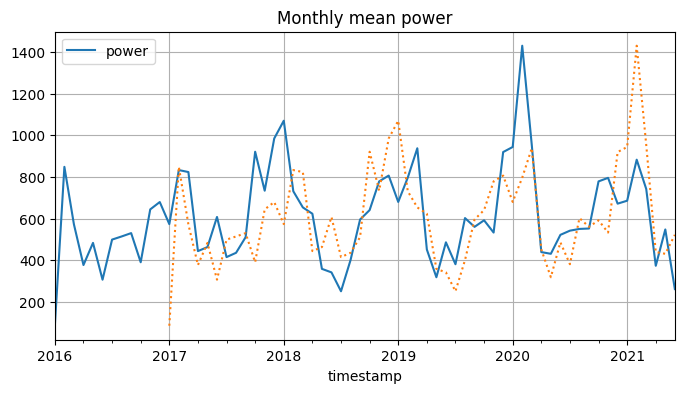

In [7]:
# resample power data to monthly
power_df_monthly = df[["power"]].resample('M').mean()
fig, ax = plt.subplots(figsize=(8, 4))
power_df_monthly.plot(ax=ax, grid=True, legend=True, title="Monthly mean power")
power_df_monthly.shift(12).plot(ax=ax, grid=True, legend=False, linestyle=":")

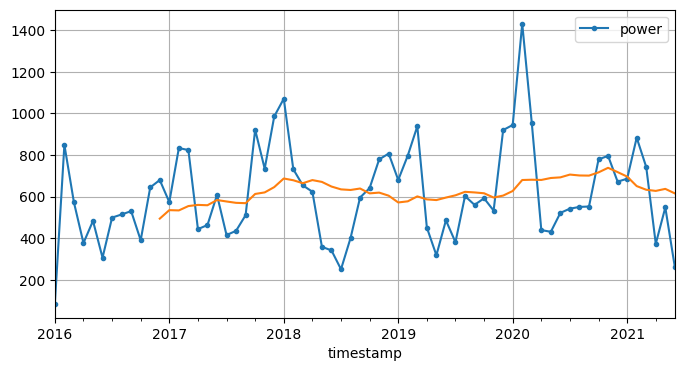

In [8]:
rolling_average_12_months = power_df_monthly.rolling(window=12).mean()

fig, ax = plt.subplots(figsize=(8, 4))
power_df_monthly.plot(ax=ax, marker=".")
rolling_average_12_months.plot(ax=ax, grid=True, legend=False)
savefig("power_rolling_avg_1_year.png")
plt.show()


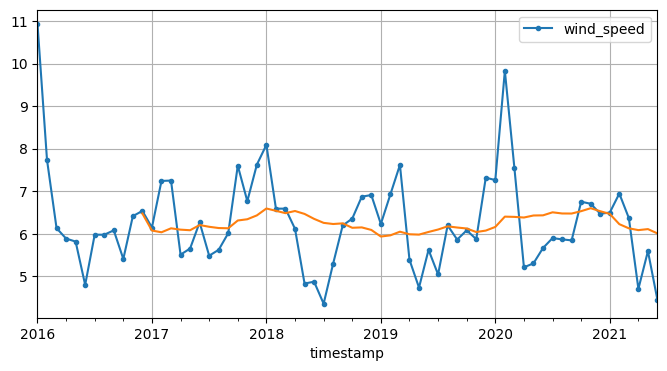

In [9]:
period = slice("2016", "2021")
wind_speed_df_monthly = df[["wind_speed"]].resample('M').mean()  # compute the mean for each month
rolling_average_12_months = wind_speed_df_monthly[period].rolling(window=12).mean()

fig, ax = plt.subplots(figsize=(8, 4))
wind_speed_df_monthly[period].plot(ax=ax, marker=".")
rolling_average_12_months.plot(ax=ax, grid=True, legend=False)
savefig("wind_speed_rolling_avg_1_year.png")
plt.show()


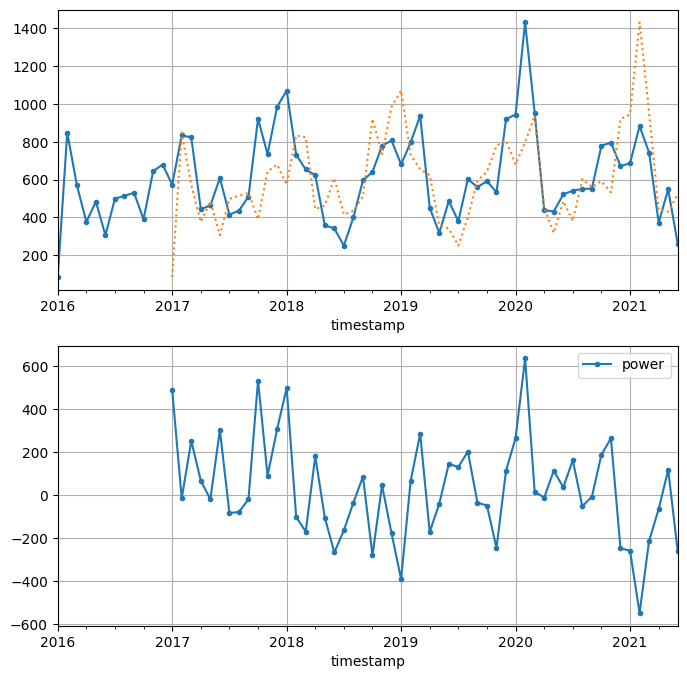

Mean absolute error: 179.37
Mean absolute percentage error: 28.52%


In [10]:
# plot yearly difference in power
power_df_diff = power_df_monthly.diff(12) # 12 mo difference

fig, axs = plt.subplots(2, 1, figsize=(8, 8))
power_df_monthly.plot(ax=axs[0], grid=True, legend=False, marker=".")  # original time series
power_df_monthly.shift(12).plot(ax=axs[0], grid=True, legend=False, linestyle=":")  # lagged
power_df_diff.plot(ax=axs[1], grid=True, marker=".")  # 12 mo difference time series
savefig("power_diff_plot.png")
plt.show()
# rather huge difference by simply shifting the time series by 12 months (naive forecast)
print(f"Mean absolute error: {power_df_diff.abs().mean()[0].round(2)}")
print(f"Mean absolute percentage error: {(power_df_diff / power_df_monthly).abs().mean()[0].round(4) * 100}%")

                           power
timestamp                       
2019-01-01 00:00:00   265.542248
2019-01-01 01:00:00   192.834687
2019-01-01 02:00:00   472.566243
2019-01-01 03:00:00   909.528051
2019-01-01 04:00:00  1462.104828
...                          ...
2019-01-05 19:00:00   203.573051
2019-01-05 20:00:00    95.904021
2019-01-05 21:00:00   403.440259
2019-01-05 22:00:00   356.708247
2019-01-05 23:00:00   407.995183

[120 rows x 1 columns]
                          power
timestamp                      
2019-01-01 00:00:00         NaN
2019-01-01 01:00:00         NaN
2019-01-01 02:00:00         NaN
2019-01-01 03:00:00         NaN
2019-01-01 04:00:00         NaN
...                         ...
2019-01-05 19:00:00   49.747476
2019-01-05 20:00:00  -67.526123
2019-01-05 21:00:00  329.395376
2019-01-05 22:00:00  268.384380
2019-01-05 23:00:00  328.590329

[120 rows x 1 columns]


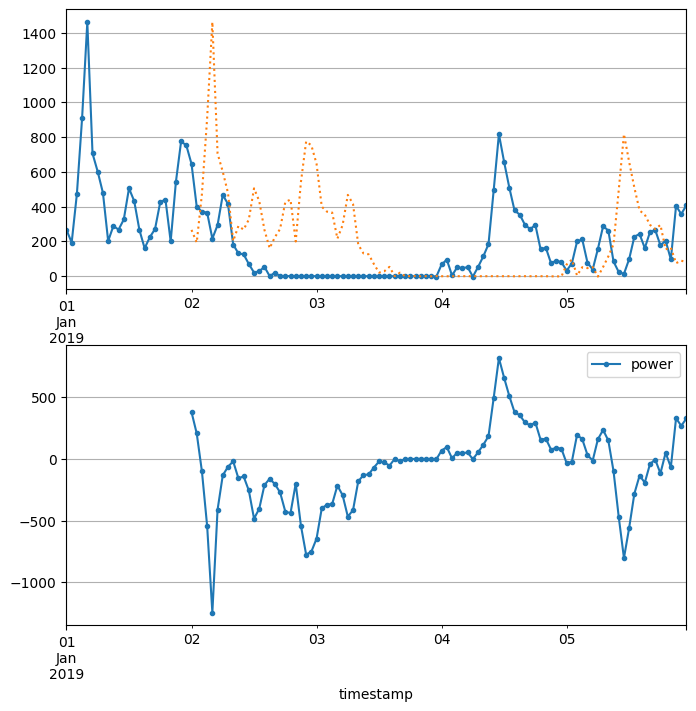

Mean absolute error: 233.66
Mean absolute percentage error: 101.20052966053858


In [11]:
# Do everything again for daily data
power_df_daily = df[["power"]]["2019-01-1":"2019-1-5"].resample('H').mean()
print(power_df_daily)

# plot yearly difference on daily level in power
power_daily_df_diff = power_df_daily.diff(24) # 365 days difference
print(power_daily_df_diff)

fig, axs = plt.subplots(2, 1, figsize=(8, 8))
power_df_daily.plot(ax=axs[0], grid=True, legend=False, marker=".")  # original time series
power_df_daily.shift(24).plot(ax=axs[0], grid=True, legend=False, linestyle=":")  # lagged
power_daily_df_diff.plot(ax=axs[1], grid=True, marker=".")  # 52 weeks difference time series
savefig("power_weekly_diff_plot.png")
plt.show()
# rather huge difference by simply shifting the time series by 52 weeks (naive forecast), even worse than monthly
print(f"Mean absolute error: {power_daily_df_diff.abs().mean()[0].round(2)}")
print(f"Mean absolute percentage error: {(power_daily_df_diff / power_df_daily).abs().mean()[0]}")